In [33]:
import models
import math
import numpy as np
import tqdm
import matplotlib.pyplot as plt

plt.rc("text", usetex=True)

In [34]:
def get_boundary_ratios(rho, bounds):
    arrival_rate = 1
    service_rate = 1 / rho
    boundary_ratios = []
    for b in bounds:
        probs = models.get_state_probabilities(
            num_classes=2,
            num_servers=1,
            arrival_rates=[arrival_rate / 2, arrival_rate / 2],
            service_rates=[service_rate, service_rate],
            thetas=[[None, 1], [1, None]],
            bound=b,
        )
        boundary_probs = [probs[s] for s in probs.keys() if (b - 1) in s]
        boundary_ratios.append(sum(boundary_probs) * len(probs) / len(boundary_probs))
    return boundary_ratios

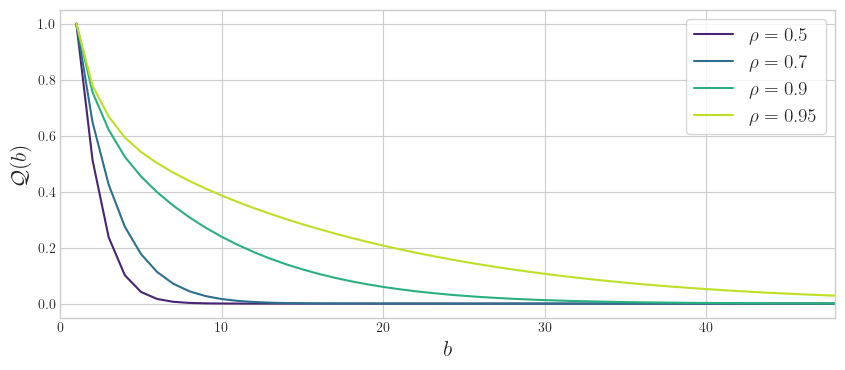

In [35]:
boundary_ratios = {}
epsilon = 0.05
rhos = [0.5, 0.7, 0.9, 0.95]
max_bound = 51
bounds = range(1, max_bound)
fig, ax = plt.subplots(1, figsize=(10, 4))
cm = plt.cm.viridis(np.linspace(0.1, 0.9, 4))
for j, rho in enumerate(rhos):
    boundary_ratios[rho] = get_boundary_ratios(rho, bounds)
    ax.plot(bounds, boundary_ratios[rho], label=rf"$\rho = {rho}$", c=cm[j])
r = r"$\mathcal{Q}(b)$"
ax.set_ylabel(r, fontsize=16)
ax.set_xlabel(r"$b$", fontsize=16)
# ax.axhline(epsilon, c='black', linestyle='dashed', label=fr"$\epsilon = {epsilon}$")
ax.legend(frameon=True, fontsize=14)
ax.set_xlim(0, 48)
fig.savefig("../tex/img/quotient_check.pdf")

In [36]:
def get_probability_of_hitting_boundary(arrival_rates, probs, hitting_probs):
    return sum(
        [
            (arrival_rates[state[-2]] / sum(arrival_rates))
            * probs[state[:-2]]
            * hitting_probs[state]
            for state in list(hitting_probs.keys())[:-1]
            if state[-2] == 0
        ]
    )

In [37]:
def get_prob_hitting_boundary(rho, bounds):
    arrival_rate = 1
    arrival_rates = [arrival_rate / 2, arrival_rate / 2]
    service_rate = 1 / rho
    boundary_hitting_probs = []
    for b in tqdm.tqdm(bounds):
        R = int(b * 0.5)
        (
            statespace,
            transmat,
        ) = models.build_state_space_and_transition_matrix_sojourn_mc(
            num_classes=2,
            num_servers=1,
            arrival_rates=arrival_rates,
            service_rates=[service_rate, service_rate],
            thetas=[[None, 1], [1, None]],
            bound=b,
        )
        probs = models.get_state_probabilities(
            num_classes=2,
            num_servers=1,
            arrival_rates=[arrival_rate / 2, arrival_rate / 2],
            service_rates=[service_rate, service_rate],
            thetas=[[None, 1], [1, None]],
            bound=b,
        )
        boundary_region = [s for s in statespace[:-1] if (b - 1) in s]
        hitting_probs = models.find_hitting_probs(statespace, transmat, boundary_region)
        boundary_hitting_probs.append(
            sum(
                [
                    (arrival_rates[state[-2]] / sum(arrival_rates))
                    * probs[state[:-2]]
                    * hitting_probs[state]
                    for state in list(hitting_probs.keys())[:-1]
                    if state[-2] == 0
                ]
            )
        )
    return boundary_hitting_probs

100%|█████████████████████████████████████████| 25/25 [27:01<00:00, 64.85s/it]


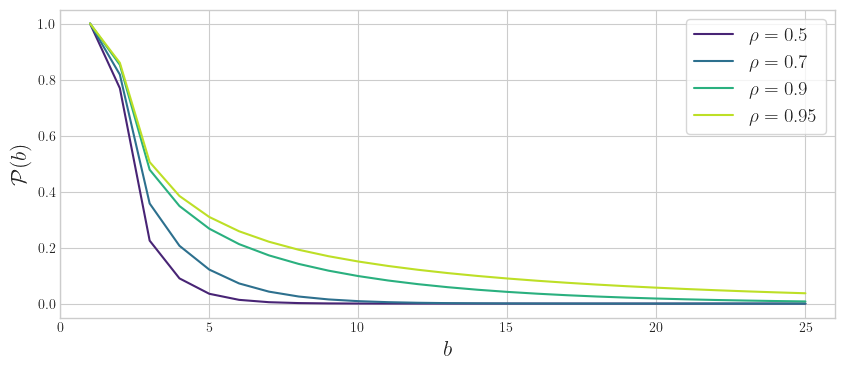

In [38]:
boundary_hitting_probs = {}
epsilon = 0.05
rhos = [0.5, 0.7, 0.9, 0.95]
max_bound = 26
bounds = range(1, max_bound)
fig, ax = plt.subplots(1, figsize=(10, 4))
cm = plt.cm.viridis(np.linspace(0.1, 0.9, 4))
for j, rho in enumerate(rhos):
    boundary_hitting_probs[rho] = get_prob_hitting_boundary(rho, bounds)
    ax.plot(bounds, boundary_hitting_probs[rho], label=rf"$\rho = {rho}$", c=cm[j])
r = r"$\mathcal{P}(b)$"
ax.set_ylabel(r, fontsize=16)
ax.set_xlabel(r"$b$", fontsize=16)
# ax.axhline(epsilon, c='black', linestyle='dashed', label=fr"$\epsilon = {epsilon}$")
ax.legend(frameon=True, fontsize=14)
ax.set_xlim(0, max_bound)
plt.show()
fig.savefig("../tex/img/hitting_check.pdf")